In [1]:
import sys 

import numpy as np

import pandas as pd

import scanpy as sc

import scvelo as scv

import matplotlib.pyplot as plt
import seaborn as sns

import cellrank as cr
from cellrank.external.kernels import WOTKernel
from cellrank.tl.kernels import ConnectivityKernel
from cellrank.tl.estimators import GPCCA

sys.path.extend(["../../..", "."])
from paths import DATA_DIR

In [2]:
adata_host = sc.read_h5ad(DATA_DIR / "processed" / "unperturbed_time_course_host.h5ad")

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


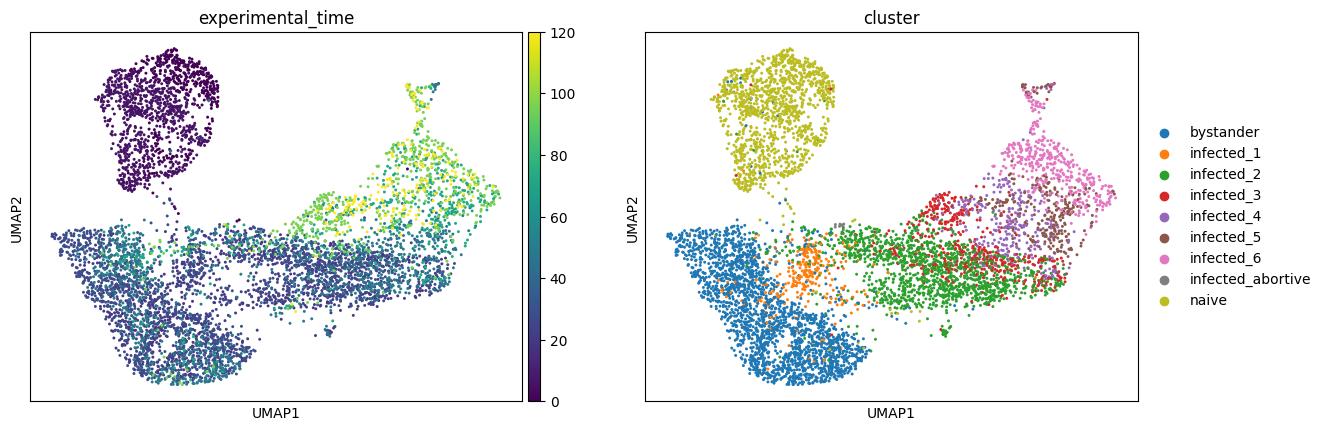

In [3]:
sc.pl.umap(adata_host, color=["experimental_time", "cluster"])

In [4]:
adata_host.obs.experimental_time = adata_host.obs.experimental_time.astype("category")
adata_host.obs.cluster = adata_host.obs.cluster.astype("category")

In [5]:
wk = WOTKernel(adata_host, time_key="experimental_time")

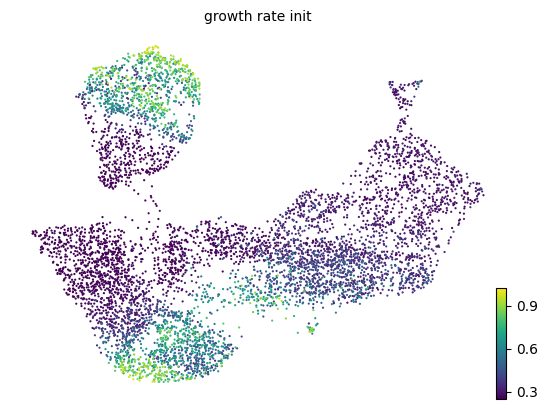

In [6]:
wk.compute_initial_growth_rates(organism="human", key_added="growth_rate_init")
scv.pl.scatter(
    adata_host, c="growth_rate_init", legend_loc="right", s=10
)

In [7]:
wk.compute_transition_matrix(
    growth_iters=3, growth_rate_key="growth_rate_init", last_time_point="connectivities"
)

  0%|          | 0/7 [00:00<?, ?time pair/s]

<WOTKernel>

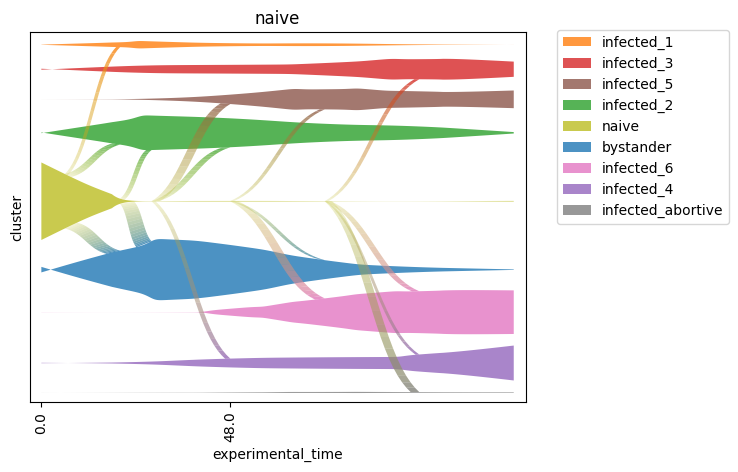

In [8]:
ax = wk.plot_single_flow(
    cluster_key="cluster",
    time_key="experimental_time",
    cluster="naive",
    min_flow=0.1,
    xticks_step_size=4,
    show=False,
    dpi=100,
)

# prettify the plot a bit, rotate x-axis tick labels
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.set_xticklabels(labels, rotation=90)

plt.show()

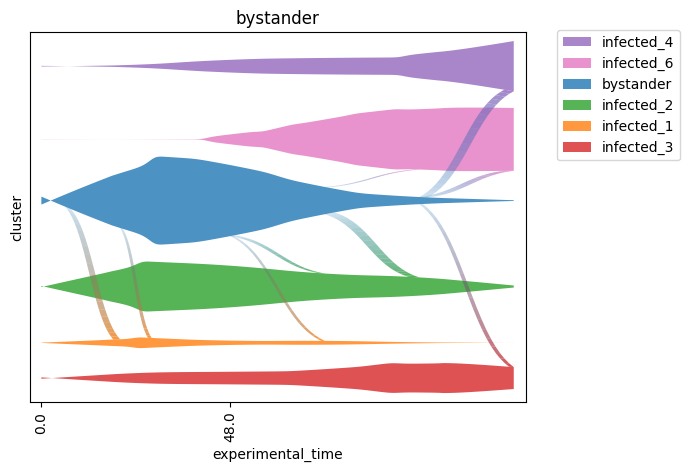

In [9]:
ax = wk.plot_single_flow(
    cluster_key="cluster",
    time_key="experimental_time",
    cluster="bystander",
    min_flow=0.1,
    xticks_step_size=4,
    show=False,
    dpi=100,
)

# prettify the plot a bit, rotate x-axis tick labels
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.set_xticklabels(labels, rotation=90)

plt.show()

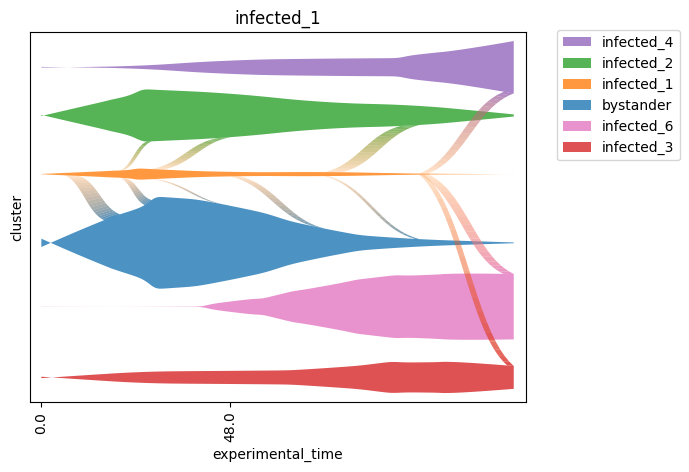

In [10]:
ax = wk.plot_single_flow(
    cluster_key="cluster",
    time_key="experimental_time",
    cluster="infected_1",
    min_flow=0.1,
    xticks_step_size=4,
    show=False,
    dpi=100,
)

# prettify the plot a bit, rotate x-axis tick labels
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.set_xticklabels(labels, rotation=90)

plt.show()

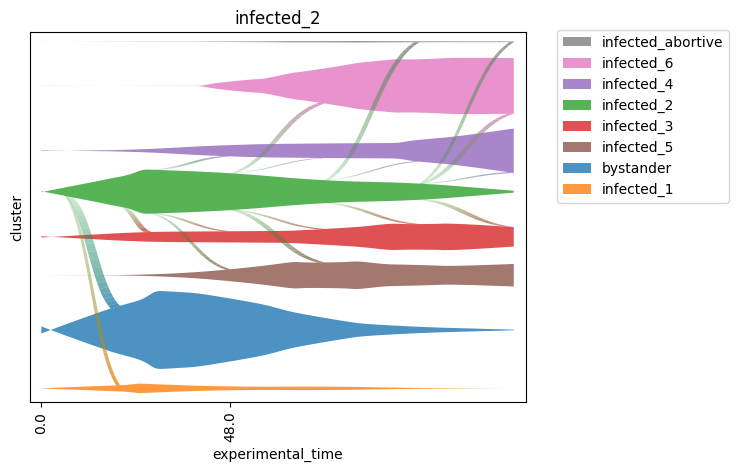

In [11]:
ax = wk.plot_single_flow(
    cluster_key="cluster",
    time_key="experimental_time",
    cluster="infected_2",
    min_flow=0.1,
    xticks_step_size=4,
    show=False,
    dpi=100,
)

# prettify the plot a bit, rotate x-axis tick labels
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.set_xticklabels(labels, rotation=90)

plt.show()

**Compute macrostates**

In [12]:
ck = ConnectivityKernel(adata_host)
ck.compute_transition_matrix()

combined_kernel = 0.9 * wk + 0.1 * ck

In [13]:
g = GPCCA(combined_kernel)

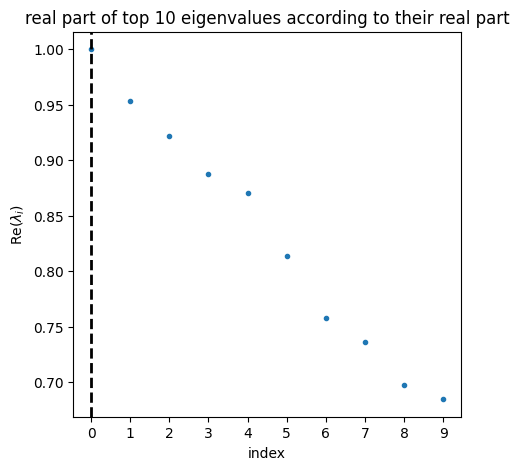

In [14]:
g.compute_schur(n_components=10)
g.plot_spectrum(real_only=True)

In [15]:
g.compute_macrostates(n_states=1)

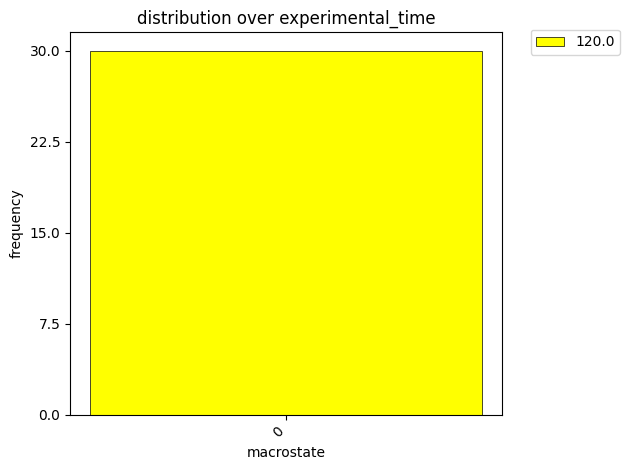

In [16]:
g.plot_macrostate_composition(key="experimental_time")

In [17]:
g.set_terminal_states_from_macrostates(["0"])

In [18]:
g.compute_absorption_probabilities(solver="gmres", use_petsc=True)

Defaulting to `'gmres'` solver.


  0%|          | 0/1 [00:00<?, ?/s]

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


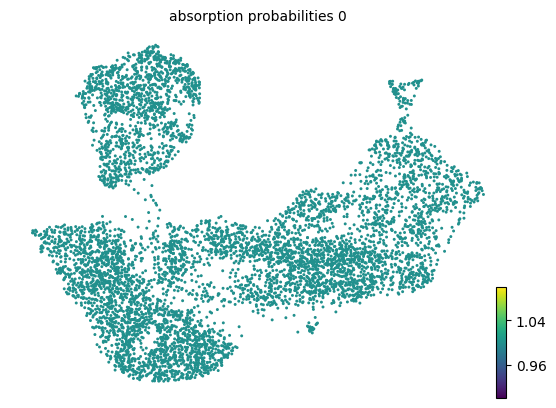

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


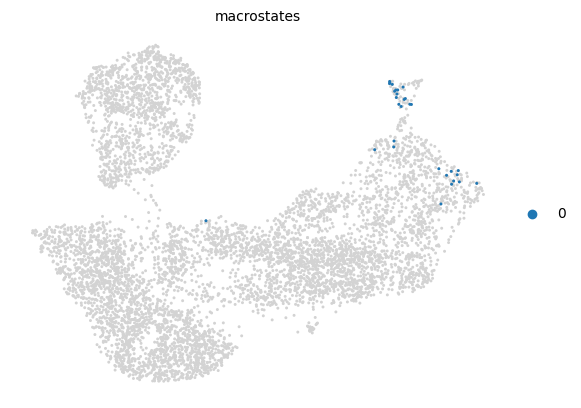

In [19]:
g.plot_absorption_probabilities(same_plot=False, perc=[0, 99])
g.plot_macrostates(discrete=True, legend_loc="right")

In [20]:
inf_drivers = g.compute_lineage_drivers(return_drivers=False)
inf_drivers.sort_values(by="0_corr", ascending=False).head(n=30)

,0_corr,0_pval,0_qval,0_ci_low,0_ci_high
gene ID,,,,,
APOE,0.351536,4.284396e-196,NaN,0.330246,0.372468
CCND2,0.350968,2.070772e-195,NaN,0.329669,0.371910
FAM71E1,0.305741,1.298805e-145,NaN,0.283744,0.327416
CD55,0.305381,2.982078e-145,NaN,0.283379,0.327061
EPCAM,0.275312,5.640168e-117,NaN,0.252903,0.297426
CRLF1,0.266118,4.834549e-109,NaN,0.243594,0.288356
RBP7,0.261388,4.368973e-105,NaN,0.238805,0.283688
HMGCS1,0.257083,1.471278e-101,NaN,0.234448,0.279439
TAC1,0.254811,1.003126e-99,NaN,0.232149,0.277195


In [21]:
inf_drivers.loc["PCSK5"]

0_corr       0.021379
0_pval       0.081925
0_qval            NaN
0_ci_low    -0.002708
0_ci_high    0.045442
Name: PCSK5, dtype: float64

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: M

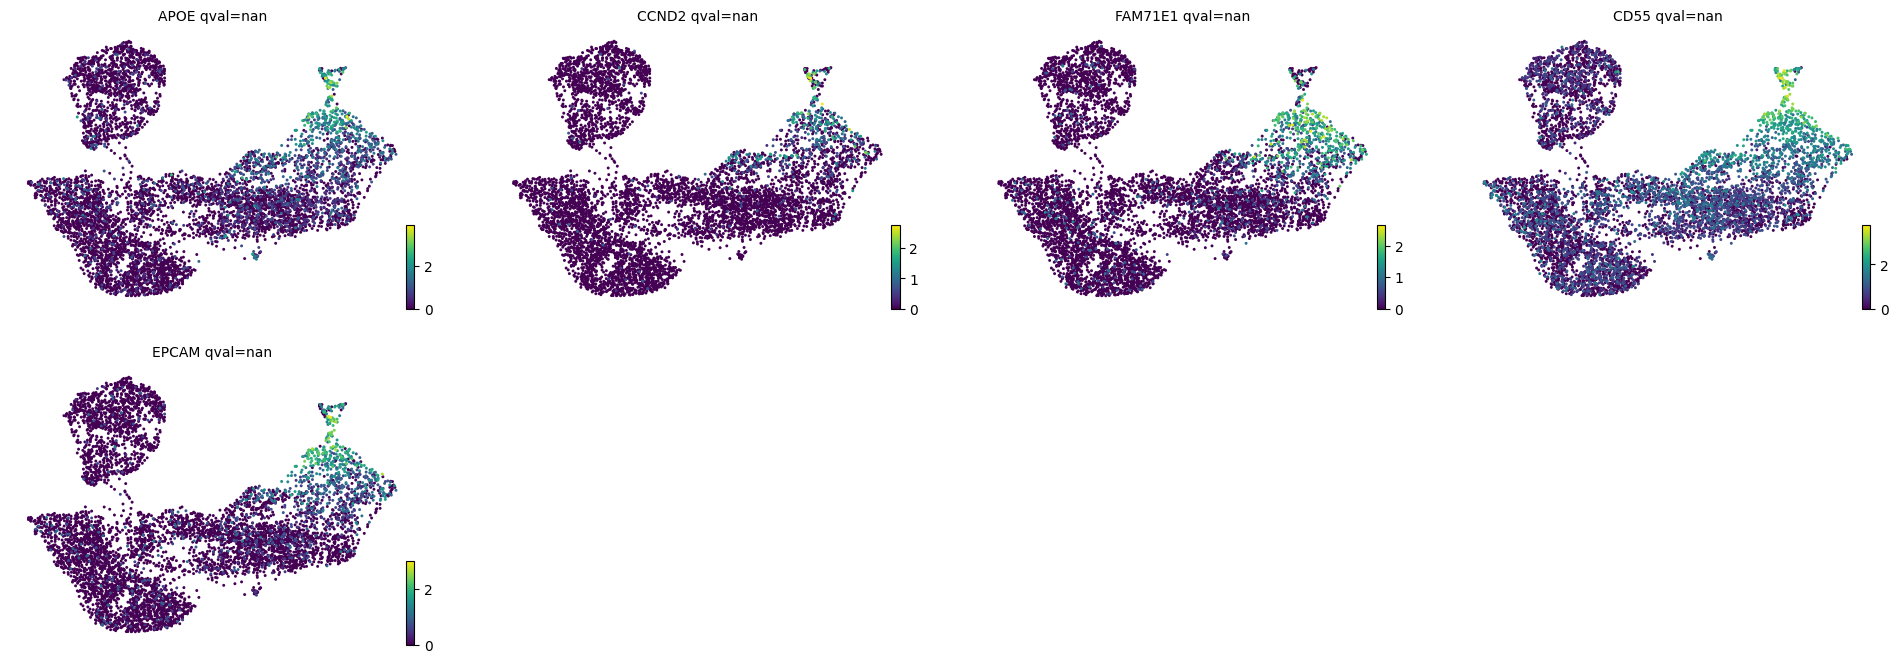

In [22]:
g.plot_lineage_drivers("0", n_genes=5)